# QuantumSim - More operations
Author: Nico Kuijpers<br>
Date: May 11, 2024

In this Jupyter notebook QuantumSim is extended with more operations. Also, some some examples are shown.

In [1]:
from quantumsim import *

## Circuit unitary operations (extended)
The class *CircuitUnitaryOperation* to compute the $2^N \times 2^N$ unitary matrices
for Pauli, Hadamard, Phase, and CNOT operations on any combinations of qubits of a circuit of $N$ qubits was introduced QuantumSimIntroduction:

https://github.com/nicokuijpers/QuantumSim/blob/main/QuantumSimIntroduction.ipynb

Below, this class is extended with controlled qubit operations, a SWAP operation, a controlled-U operation, a controlled-SWAP 
(or Fredkin) operation, and a controlled-controlled-NOT (or Toffoli) operation. These operations are also included in QuantumSim:

https://github.com/nicokuijpers/QuantumSim/blob/main/quantumsim.py

### Controlled qubit operation
The CNOT operation is in fact a controlled-Pauli_X operation. In a similar fashion, 
controlled versions the other qubit operations can be created.

Below, the class *CircuitUnitaryOperation* is extended with method *get_combined_operation_for_controlled_qubit_operation()* 
to determine the controlled version of any qubit operation. Using this method the following methods are implemented:
* *get_combined_operation_for_cnot()*
* *get_combined_operation_for_controlled_pauli_y()*
* *get_combined_operation_for_controlled_pauli_z()*
* *get_combined_operation_for_controlled_hadamard()*
* *get_combined_operation_for_controlled_phase()*

In [2]:
"""
Functions to obtain N x N unitary matrices for unitary operations on quantum circuits of N qubits.
"""
class CircuitUnitaryOperation:
    @staticmethod
    def get_combined_operation_for_controlled_qubit_operation(operation, control, target, N):
        identity = QubitUnitaryOperation.get_identity()
        ket_bra_00 = Dirac.ket_bra(2,0,0)
        ket_bra_11 = Dirac.ket_bra(2,1,1)
        combined_operation_zero = np.eye(1,1)
        combined_operation_one = np.eye(1,1)
        for i in range (0, N):
            if control == i:
                combined_operation_zero = np.kron(combined_operation_zero, ket_bra_00)
                combined_operation_one  = np.kron(combined_operation_one, ket_bra_11)
            elif target == i:
                combined_operation_zero = np.kron(combined_operation_zero, identity)
                combined_operation_one  = np.kron(combined_operation_one, operation)
            else:
                combined_operation_zero = np.kron(combined_operation_zero, identity)
                combined_operation_one  = np.kron(combined_operation_one, identity)
            
        return combined_operation_zero + combined_operation_one
    
    @staticmethod
    def get_combined_operation_for_cnot(control, target, N):
        pauli_x = QubitUnitaryOperation.get_pauli_x()     
        return CircuitUnitaryOperation.get_combined_operation_for_controlled_qubit_operation(pauli_x, control, target, N)
    
    @staticmethod
    def get_combined_operation_for_controlled_pauli_y(control, target, N):
        pauli_y = QubitUnitaryOperation.get_pauli_y()
        return CircuitUnitaryOperation.get_combined_operation_for_controlled_qubit_operation(pauli_y, control, target, N)
    
    @staticmethod
    def get_combined_operation_for_controlled_pauli_z(control, target, N):
        pauli_z = QubitUnitaryOperation.get_pauli_z()
        return CircuitUnitaryOperation.get_combined_operation_for_controlled_qubit_operation(pauli_z, control, target, N)
    
    @staticmethod
    def get_combined_operation_for_controlled_hadamard(control, target, N):
        hadamard = QubitUnitaryOperation.get_hadamard()
        return CircuitUnitaryOperation.get_combined_operation_for_controlled_qubit_operation(hadamard, control, target, N)
    
    @staticmethod
    def get_combined_operation_for_controlled_phase(theta, control, target, N):
        phase_theta = QubitUnitaryOperation.get_phase(theta)
        return CircuitUnitaryOperation.get_combined_operation_for_controlled_qubit_operation(phase_theta, control, target, N)
    
    @staticmethod
    def get_combined_operation_for_swap(a, b, N):
        combined_operation_cnot_a_b = CircuitUnitaryOperation.get_combined_operation_for_cnot(a, b, N)
        combined_operation_cnot_b_a = CircuitUnitaryOperation.get_combined_operation_for_cnot(b, a, N)
        return np.dot(np.dot(combined_operation_cnot_a_b,combined_operation_cnot_b_a),combined_operation_cnot_a_b)

### SWAP operation
The SWAP operation exchanges the states of two qubits. For a circuit of two qubits, the SWAP operation is defined by
the following unitary matrix:

$\text{SWAP} = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ \end{pmatrix}$

When the SWAP operation is applied on a $2$-qubit circuit, the classical states are transformed as follows:

$\text{SWAP} \cdot |00\rangle = |00\rangle$<br>
$\text{SWAP} \cdot |01\rangle = |10\rangle$<br>
$\text{SWAP} \cdot |10\rangle = |01\rangle$<br>
$\text{SWAP} \cdot |11\rangle = |11\rangle$

The four Bell states are transformed as follows:

$\text{SWAP} \cdot |\Phi^+\rangle = \text{SWAP} \cdot \left( \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) \right) = 
\frac{1}{\sqrt{2}}(|00\rangle + |11\rangle) =  |\Phi^+\rangle$<br>
$\text{SWAP} \cdot |\Phi^-\rangle = \text{SWAP} \cdot \left( \frac{1}{\sqrt{2}}(|00\rangle - |11\rangle) \right) = 
\frac{1}{\sqrt{2}}(|00\rangle - |11\rangle) =  |\Phi^-\rangle$<br>
$\text{SWAP} \cdot |\Psi^+\rangle = \text{SWAP} \cdot \left( \frac{1}{\sqrt{2}}(|01\rangle + |10\rangle) \right) = 
\frac{1}{\sqrt{2}}(|10\rangle + |01\rangle) =  |\Psi^+\rangle$<br>
$\text{SWAP} \cdot |\Psi^-\rangle = \text{SWAP} \cdot \left( \frac{1}{\sqrt{2}}(|01\rangle - |10\rangle) \right) = 
\frac{1}{\sqrt{2}}(|10\rangle - |01\rangle) = -|\Psi^-\rangle$

A SWAP operation has the same effect as three times applying the CNOT operation.

In QuantumSim, the $\text{SWAP}(a,b)$ operation is implemented by applying the $\text{CNOT}$ operation three times as follows:
1. $\text{CNOT}(a,b)$
2. $\text{CNOT}(b,a)$
3. $\text{CNOT}(a,b)$

If the unitary matrix for $\text{CNOT}(a,b)$ is denoted by $U_{\text{CNOT}(a,b)}$ and the the unitary matrix for 
$\text{CNOT}(b,a)$ by $U_{\text{CNOT}(b,a)}$, then unitary matrix $U_{\text{SWAP}(a,b)}$ for unitary operation
$\text{SWAP}(a,b)$ is defined by

$U_{\text{SWAP}(a,b)} = U_{\text{CNOT}(a,b)} \cdot U_{\text{CNOT}(b,a)} \cdot U_{\text{CNOT}(a,b)}$.

Below, the class *CircuitUnitaryOperation* is extended with method *get_combined_operation_for_swap()* to determine
$U_{\text{SWAP}(a,b)}$ for a circuit of $N$ qubits and $0 \leq a, b < N$.

In [3]:
"""
Functions to obtain N x N unitary matrices for unitary operations on quantum circuits of N qubits.
"""
class CircuitUnitaryOperation:
    
    @staticmethod
    def get_combined_operation_for_swap(a, b, N):
        combined_operation_cnot_a_b = CircuitUnitaryOperation.get_combined_operation_for_cnot(a, b, N)
        combined_operation_cnot_b_a = CircuitUnitaryOperation.get_combined_operation_for_cnot(b, a, N)
        return np.dot(np.dot(combined_operation_cnot_a_b,combined_operation_cnot_b_a),combined_operation_cnot_a_b)

### Example
In this example a circuit of two qubits is created.
The Hadamard gate is applied to qubit $0$ and then the SWAP operation is applied to swap the states of qubit $0$ and $1$
During execution, all combined operations and intermidiate quantum states are printed. 
The circuit collapses to a classical state when measured. This classical state is also printed.

Try to run this code several times and observe that sometimes the classiscal state is $|00\rangle$, and sometimes it is $|01\rangle$. 

In [4]:
circuit = Circuit(2)
circuit.hadamard(0)
circuit.swap(0,1)
circuit.execute(print_state=True)
circuit.measure(print_state=True)

Initial quantum state
|00> : (1+0j)
|01> : 0j
|10> : 0j
|11> : 0j
Hadamard on qubit 0
[[ 0.70710678+0.j  0.        +0.j  0.70710678+0.j  0.        +0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        +0.j  0.70710678+0.j]
 [ 0.70710678+0.j  0.        +0.j -0.70710678-0.j  0.        -0.j]
 [ 0.        +0.j  0.70710678+0.j  0.        -0.j -0.70710678-0.j]]
Current quantum state
|00> : (0.7071067811865475+0j)
|01> : 0j
|10> : (0.7071067811865475+0j)
|11> : 0j
SWAP on qubit 0 and qubit 1
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Current quantum state
|00> : (0.7071067811865475+0j)
|01> : (0.7071067811865475+0j)
|10> : 0j
|11> : 0j
Measured state:
|00>


### Example
In this example a circuit of $4$ qubits is created. 
The Hadamard operation is applied on the second qubit and the states of the second and the fourth qubit are swapped.
As before, the classical states are stored in a string array and a histogram is plotted.

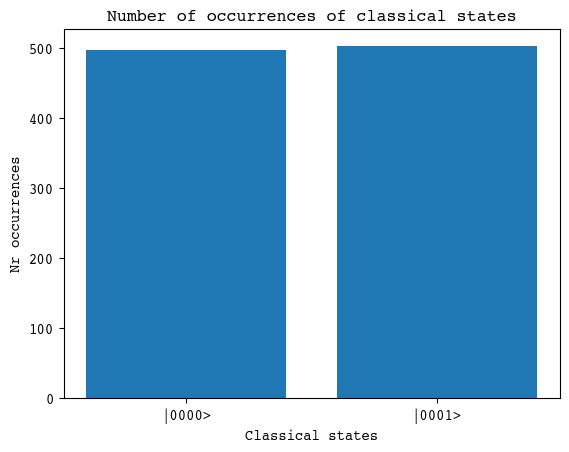

In [5]:
circuit = Circuit(4)
circuit.hadamard(1)
circuit.swap(1,3)
result = QuantumUtil.run_circuit(circuit)
QuantumUtil.histogram_of_classical_states(result)


### Controlled unitary operation
A controlled unitary operation is a unitary operation that is applied depending on the state of a control qubit. 
Assume qubit $0$ is the control qubit and unitary matrix $U$ of size $N-1 \times N-1$ represents a unatiry operation on
qubits $1$ through $N-1$.
Then unitary matrix $U_{\text{control}}$ of size $N \times N$ for the corresponding controlled unitary operation 
is defined by:

$U_{\text{control}} = |0\rangle \langle 0| \otimes \mathbf{I_{N-1 \times N-1}} + |1\rangle \langle 1| \otimes U$,

where $\mathbf{I}_{N-1 \times N-1}$ is the identity matrix of the same size as matrix $U$.

Below, the class *CircuitUnitaryOperation* is extended with method *get_combined_operation_for_controlled_unitary_operation()* 
to determine $U_{\text{control}}$ for a circuit of $N$ qubits where qubit $0$ is the control qubit and $U$ a
unitary matrix of size $N-1 \times N-1$.

In [6]:
"""
Functions to obtain N x N unitary matrices for unitary operations on quantum circuits of N qubits.
"""
class CircuitUnitaryOperation:
    
    @staticmethod
    def get_combined_operation_for_controlled_unitary_operation(operation):
        # Qubit 0 is the control
        identity = np.eye(*operation.shape)
        ket_bra_00 = Dirac.ket_bra(2,0,0)
        ket_bra_11 = Dirac.ket_bra(2,1,1)
        combined_operation_zero = np.kron(ket_bra_00,identity)
        combined_operation_one = np.kron(ket_bra_11,operation)
        return combined_operation_zero + combined_operation_one

### Fredkin operation
The Fredkin operation is a controlled-SWAP operation. 
Assume qubit $0$ is the control qubit and let unitary matrix $U_{\text{SWAP}(a-1,b-1)}$ of size $N-1 \times N-1$ 
be the unitary matrix corresponding to the SWAP operation on qubits $a$ and $b$, with $0 < a,b < N-1$.
The unitary matrix $U_{\text{fredkin}}$ of size $N \times N$ for the corresponding controlled-SWAP operation 
is then defined by:

$U_{\text{fredkin}} = |0\rangle \langle 0| \otimes \mathbf{I_{N-1 \times N-1}} + |1\rangle \langle 1| \otimes \text{SWAP}(a-1,b-1)$,

where, $\mathbf{I}_{N-1 \times N-1}$ is the identity matrix of the same size as matrix $\text{SWAP}(a-1,b-1)$.

We implement the Fredkin operation by first swapping the control qubit with qubit $0$, then applying $U_{\text{fredkin}}$
as defined above, and finally swapping qubit $0$ with the control qubit.

Below, the class *CircuitUnitaryOperation* is extended with method *get_combined_operation_for_fredkin()*. 

In [7]:
"""
Functions to obtain N x N unitary matrices for unitary operations on quantum circuits of N qubits.
"""
class CircuitUnitaryOperation:

    @staticmethod
    def get_combined_operation_for_fredkin(control, a, b, N):
        combined_operation_swap_control_0 = CircuitUnitaryOperation.get_combined_operation_for_swap(control, 0, N)
        combined_operation_swap_a_b = CircuitUnitaryOperation.get_combined_operation_for_swap(a-1, b-1, N-1)
        combined_operation_fredkin = CircuitUnitaryOperation.get_combined_operation_for_controlled_unitary_operation(combined_operation_swap_a_b)
        return np.dot(np.dot(combined_operation_swap_control_0, combined_operation_fredkin), combined_operation_swap_control_0)
    

### Example
In this example a circuit of $5$ qubits is created. The Hadamard operation is applied on qubit $1$ and the Pauli X operation on qubit $3$.
Next, the Fredkin operation is applied, which is a controlled-SWAP operation. Qubits $3$ and $4$ will be swapped depending on the value of qubit $1$.

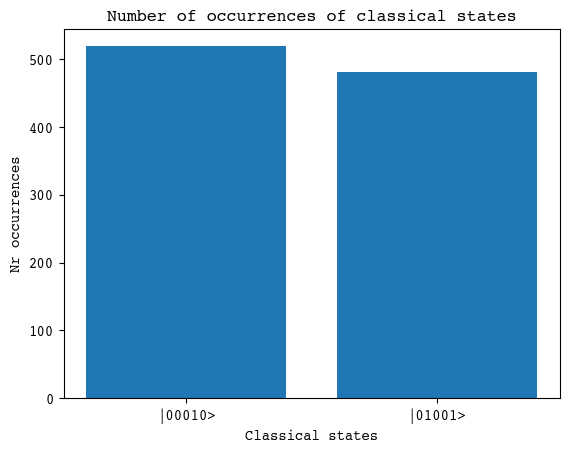

In [8]:
circuit = Circuit(5)
circuit.hadamard(1)
circuit.pauli_x(3)
circuit.fredkin(1,3,4)
result = QuantumUtil.run_circuit(circuit)
QuantumUtil.histogram_of_classical_states(result)


### Toffoli operation
The Toffoli operation is a controlled-CNOT operation. 
Assume qubit $0$ is the control qubit and let unitary matrix $U_{\text{CNOT}(a-1,b-1)}$ of size $N-1 \times N-1$ 
be the unitary matrix corresponding to the CNOT operation on qubits $a$ and $b$, with $0 < a,b < N-1$.
The unitary matrix $U_{\text{toffoli}}$ of size $N \times N$ for the corresponding controlled-CNOT operation 
is then defined by:

$U_{\text{toffoli}} = |0\rangle \langle 0| \otimes \mathbf{I_{N-1 \times N-1}} + |1\rangle \langle 1| \otimes \text{CNOT}(a-1,b-1)$,

where, $\mathbf{I}_{N-1 \times N-1}$ is the identity matrix of the same size as matrix $\text{CNOT}(a-1,b-1)$.

In QuantumSim, the Toffoli operation is implemented by first swapping the control qubit with qubit $0$, then applying $U_{\text{toffoli}}$
as defined above, and finally swapping qubit $0$ with the control qubit.

Below, the class *CircuitUnitaryOperation* is extended with method *get_combined_operation_for_toffoli()*.

In [9]:
"""
Functions to obtain N x N unitary matrices for unitary operations on quantum circuits of N qubits.
"""
class CircuitUnitaryOperation:
    
    @staticmethod
    def get_combined_operation_for_toffoli(control, a, b, N):
        combined_operation_swap_control_0 = CircuitUnitaryOperation.get_combined_operation_for_swap(control, 0, N)
        combined_operation_cnot_a_b = CircuitUnitaryOperation.get_combined_operation_for_cnot(a-1, b-1, N-1)
        combined_operation_toffoli = CircuitUnitaryOperation.get_combined_operation_for_controlled_unitary_operation(combined_operation_cnot_a_b)
        return np.dot(np.dot(combined_operation_swap_control_0, combined_operation_toffoli), combined_operation_swap_control_0)
    

### Example
In this example a circuit of $5$ qubits is created. The Hadamard operation is applied on qubit $1$ and the Pauli X operation on qubit $3$.
Next, the Toffoli operation is applied, which is a controlled-CNOT operation. Qubit $4$ will be inverted when
both qubit $1$ and qubit $3$ have state $|1\rangle$.

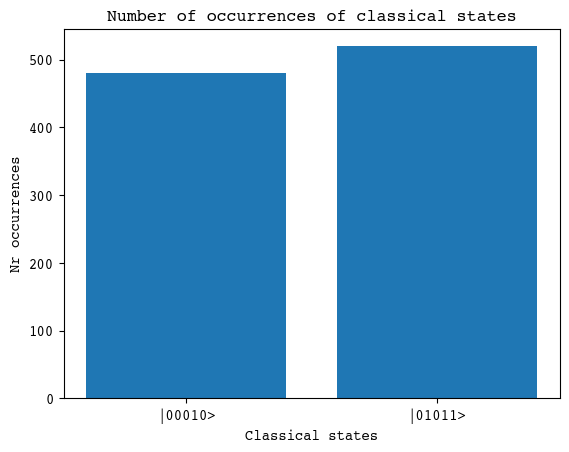

In [10]:
circuit = Circuit(5)
circuit.hadamard(1)
circuit.pauli_x(3)
circuit.toffoli(1,3,4)
result = QuantumUtil.run_circuit(circuit)
QuantumUtil.histogram_of_classical_states(result)

### Example
In this example a circuit of $5$ qubits is created. The Hadamard operation is applied on qubit $1$ and on qubit $3$.
Next, the Toffoli operation is applied, which is a controlled-CNOT operation. As before, qubit $4$ will be inverted when
both qubit $1$ and qubit $3$ have state $|1\rangle$.

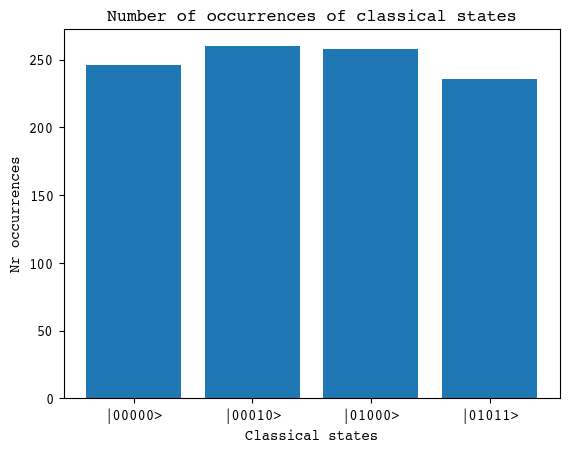

In [11]:
circuit = Circuit(5)
circuit.hadamard(1)
circuit.hadamard(3)
circuit.toffoli(1,3,4)
result = QuantumUtil.run_circuit(circuit)
QuantumUtil.histogram_of_classical_states(result)